In [230]:
import yfinance as yf
import pandas as pd

In [231]:
data=pd.read_csv('constituents_csv.csv')

In [232]:
stocks=""
for stock in data['Symbol']:
    stocks=stocks+stock+" "
stocks

'MMM AOS ABT ABBV ABMD ACN ATVI ADM ADBE AAP AMD AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON APA AAPL AMAT APTV ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY BKR BLL BAC BBWI BAX BDX BRK.B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF.B CHRW CDNS CZR CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CERN CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CPRT GLW CTVA COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA LLY EMR ENPH ETR EOG EFX EQIX EQR ESS EL ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FB FAST FRT FDX FIS FITB FRC FE FISV FLT FMC F FTNT FTV FBHS FOXA FOX BEN FCX GPS GRMN IT GNRC GD GE GIS GM GPC GILD GPN GL GS HAL HBI HAS HCA PEAK HSIC HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUM HBAN HI

In [234]:
tickers = yf.Tickers(stocks)
df = tickers.history(period="5y")
df

KeyboardInterrupt: 

In [235]:
df['Close']['AAL'].loc['2017-01-03']

[**                     4%                       ]  22 of 505 completed

44.74123001098633

[**********************55%*                      ]  278 of 505 completed

In [183]:
goals={'lastyearperformance': 90,
      'maxdrawdown': 50
      }

In [196]:
last_year=df.loc['2021-01-04':'2021-12-31']

In [164]:
df['month'] = df.index.month


In [184]:
performance=last_year['Close'].loc['2021-12-31']/last_year['Close'].loc['2021-01-04']


In [209]:
performance_list=set(performance[performance>1+(goals['lastyearperformance']/100)].index)

In [210]:
maxdrawdown=last_year['Low'].min()/last_year['High'].max()

In [211]:
maxdrawdown_list=set(maxdrawdown[maxdrawdown<(1-goals['maxdrawdown']/100)].index)

In [215]:

candidate_stocks=list(maxdrawdown_list.intersection(performance_list))
candidate_stocks

['F',
 'FANG',
 'DVN',
 'STX',
 'SPG',
 'FTNT',
 'IT',
 'NUE',
 'MRNA',
 'BBWI',
 'IRM',
 'NVDA',
 'ANET',
 'EXR',
 'MRO']

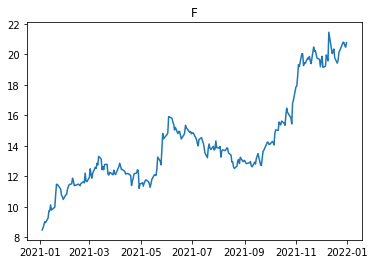

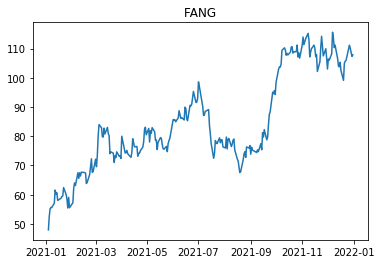

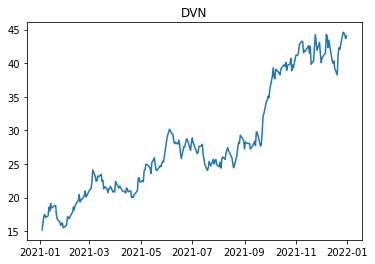

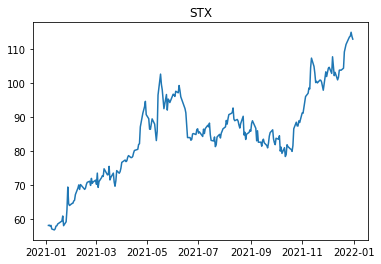

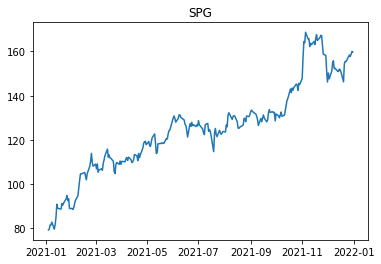

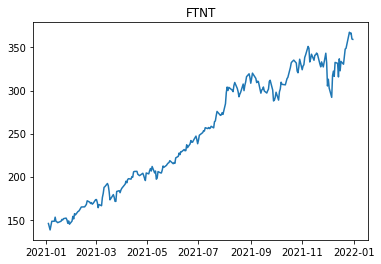

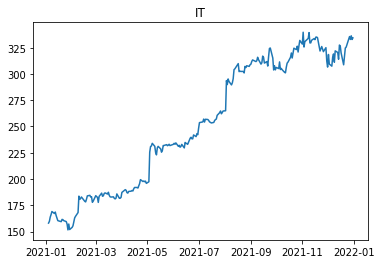

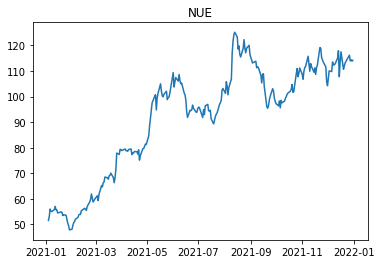

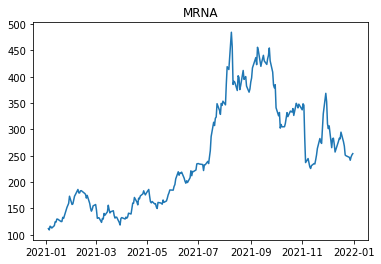

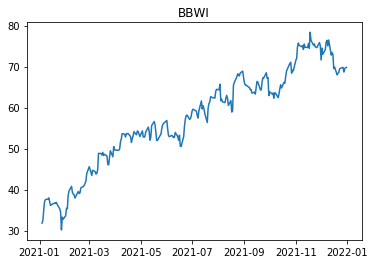

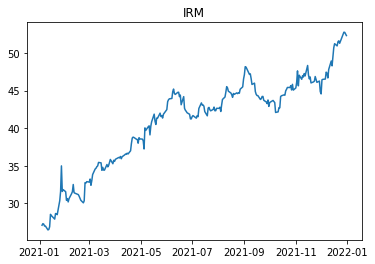

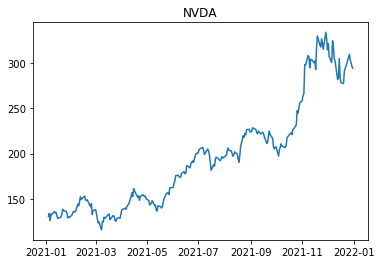

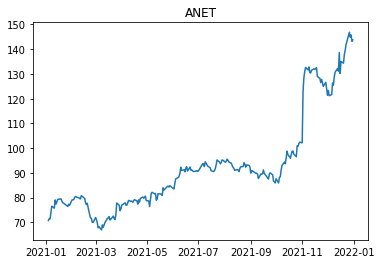

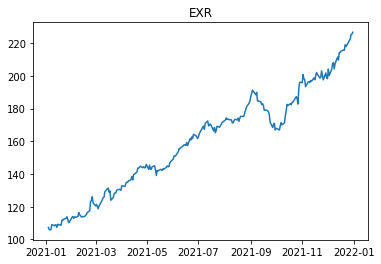

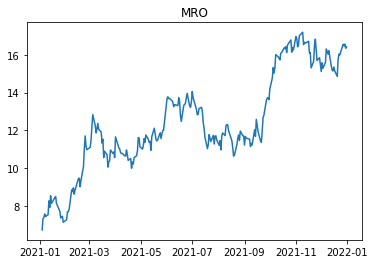

In [229]:
import matplotlib.pyplot as plt
for stock in candidate_stocks:
    plt.figure()
    plt.plot(last_year['Close'][stock])
    plt.title(stock)
    plt.show()
    #last_year['Close'][stock].plot(title="stock prices",label=stock)
    
